# La Méthode « diviser pour régner »
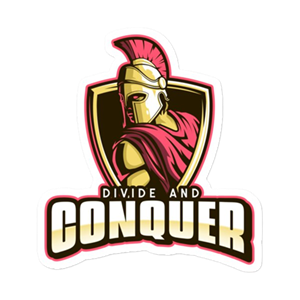


---
## Introduction

Lors de nos précédents cours, nous avons rencontré les cas suivants :
- A chaque nouvel appel d'une fonction **récursive**, nous réduisons la taille d'un problème de 1. Par exemple, lorsque nous avons écrit la fonction `factorielle` de manière récursive :
$$factorielle(n) = \left\{ \begin{array}{ll}     1 {~si~} n = 0\\    n * factorielle(n - 1){~sinon.} \end{array}\right.$$
à chaque appel récursif, la taille du problème passe de $n$ à $n-1$.  

- Avec une recherche par **dichotomie** dans un tableau trié, à chaque itération, nous recherchons notre valeur dans la moitié du tableau précédent, donc la taille du problème passe de $n$ à $n \over 2$.  

Dans ce second cas, nous avons appliqué en partie la méthode **diviser pour régner**.



## Définition

> 📌 **"Diviser pour régner"** (ou _divide and conquer_) est une méthode algorithmique consistant à ramener la résolution d'un problème de taille $n$ à la résolution de plusieurs sous-problèmes de taille plus petite (une fraction de $n$).  
>Elle peut ainsi se résumer en trois phases :
>- **Diviser** : On découpe le problème en plusieurs sous-problèmes
>- **Régner** : On résout chacun des sous-problémes
>- **Combiner** : On fusionne les résultats pour arriver à la solution finale



---
## Exemple de l'exponentiation rapide

L'**exponentation** est l'opération mathématique qui élève une quantité à une certaine puissance : $2^{10}$, $5^{20}$,$a^n$.  
En python, il est possible d'utiliser divers opérateurs ou fonctions pour élever un entier à une certaine puissance :
```Python
>>> 2**10
1024
>>> pow(2, 10)
1024
```
Nous allons ci-dessous étudier différents algorithmes d'exponentiation et comparer leur complexité.


### Algorithme récursif

Il est possible de définir $puissance(x, n)$ qui calcule $x^n$, par l'algorithme suivant :  

$$puissance(x, n) = \left\{ \begin{array}{ll}     1 {~si~} n = 0\\    x * puissance(x, n - 1){~sinon.} \end{array}\right.$$


---
#### 💻 EXERCICE 1
> Ecrivez la fonction `puissance(x, n)` en python selon la spécification ci-dessus.

In [ ]:
# à completer


In [ ]:
# Vérification
puissance(2,10) # Doit retourner 1024

#### Complexité

Comptons le nombre d'appels récursifs dans le calcul :

- Pour $x^0$ la fonction ne fait aucun appel récursif et renvoie directement le résultat.
- Pour $x^1$ la fonction calculera $x \times x^0$ et fera donc $1$ appel récursif.
- Pour $x^4$ la fonction calculera $x \times x^3 = x \times x \times x^2 =  x \times x \times x \times x^1 = x \times x \times x \times x \times x^0 = x \times x \times x \times x \times 1$ et fera donc $4$ appels récursifs.
- Pour $x^{10}$ la fonction calculera $x \times x^9 = x \times x \times x^8 =  x \times x \times x \times x^7 = ... = x \times x \times x \times x \times x  \times x  \times x  \times x  \times x  \times x \times 1$ et fera donc $10$ appels récursifs.
- ...

On pourra généraliser le processus en disant que le calcul de $x^n$ effectuera $n$ appels récursifs.  
>📌 **La complexité de l'exponentiation récursive est linéaire soit $\mathcal{O}(n)$**  


#### Limites

Utilisons la fonction précédente pour calculer $2^{1000}$. Que se passe-t-il ?


In [ ]:
# à exécuter
puissance(2,1000)

> Le calcul de $2^{1000}$ effectue trop d'appels récursifs et dépasse la limite autorisée par Python.

Déterminez la plus grande puissance de 2 que l'on peut calculer de cette manière.

In [ ]:
# à completer


### Algorithme "Diviser pour régner"

Par le jeu des puissances, on peut écrire : si $n$ est pair $x^n = (x*x)^{n \over 2}$ qui deviendra $x^n = x*(x*x)^{n-1 \over 2}$ si $n$ est impair.  

On pourra donc définir $puissance(x, n)$ qui calcule $x^n$, par la formule suivante :  

$$puissance(x, n) = \left\{ \begin{array}{ll}     1 {~si~} n = 0 \\    puissance(x*x, \frac{n}{2}) {~si~n~est~pair} \\ x * (puissance(x*x, \frac{n - 1}{2}))  {~si~n~est~impair} \end{array}\right.$$


---
#### 💻 EXERCICE 2
> Ecrivez la fonction `puissance2(x, n)` en python selon la spécification ci-dessus.

In [ ]:
# à completer


In [ ]:
# Vérification
puissance2(2,10) # Doit retourner 1024

#### Complexité

Comptons le nombre d'appels récursifs dans le calcul :

- Pour $x^0$ la fonction ne fait aucun appel récursif et renvoie directement le résultat.
- Pour $x^1$ la fonction calculera $x \times (x \times x)^0$ et fera donc $1$ appel récursif.
- Pour $x^4$ la fonction calculera $(x \times x)^2 = ((x \times x) \times (x \times x))^1 =   (x \times x \times x \times x) \times(x \times x \times x \times x)^0$ et fera donc $3$ appels récursifs.
- Pour $x^{10}$ la fonction fera $4$ appels récursifs.
- Pour $x^{100}$ la fonction fera $7$ appels récursifs.
- ...

On pourra généraliser le processus en disant que le calcul de $x^n$ effectuera $log_2(n)$ appels récursifs.  
>📌 **La complexité de l'exponentiation rapide est logarithmique soit $\mathcal{O}(log_2(n))$**


#### Limites

Utilisons la fonction précédente pour calculer $2^{1000}$. Que se passe-t-il ?

In [ ]:
# à exécuter
puissance2(2,1000)

### Performances des deux algorithmes

Exécutez le code suivant qui affiche le temps d'exécution de nos deux fonctions d'exponentiation en fonction de l'exposant $n$.

Vous noterez la performance de l'exponentiation rapide.

In [ ]:
import sys 
import timeit
import matplotlib.pyplot as plt
sys.setrecursionlimit(2*10**4) # Pour modifier le nombre maximal d'appels récursifs

abscisse = [100,200,300,400,500,600,700,800,900,1000]
x = 2
ordonnee = []
ordonnee_dpr = []

for n in abscisse:
    temps=timeit.timeit("puissance(x, n)", number=100, globals=globals())
    ordonnee.append(1000*temps)
    temps=timeit.timeit("puissance2(x, n)", number=100, globals=globals())
    ordonnee_dpr.append(1000*temps)



plt.plot(abscisse, ordonnee, "r-", label="Récursif classique")
plt.plot(abscisse, ordonnee_dpr, "b-", label="Diviser pour régner")

plt.xlabel("Exposant")
plt.ylabel("Temps en ms")

plt.legend()
plt.show()
plt.close()

sys.setrecursionlimit(1000) # Pour remettre le nombre à sa valeur d'origine

---
## Exemple du Tri Fusion

### Introduction
En première, puis en début de terminale, nous avons vu les algorithmes de tris suivants :
- Tri par **sélection** : On parcourt la liste en sélectionnant le plus petit élément que l'on place en début de liste.   
- Tri par **insertion** : On parcourt la liste en insérant chaque élément à sa place dans la liste.  
> 📌 **La complexité de ces deux algorithmes est quadratique soit $\mathcal{O}(n^2)$**.   

Autrement dit : le tri d'une liste de $100$ éléments nécessite $100^2 = 10~000$ opérations

Cette année, nous allons étudier un algorithme beaucoup plus efficace et très utilisé inventé par John Von Neumann en 1945: le **tri fusion** (ou _merge sort_). Cet algorithme nous permettra d'illustrer la méthode diviser pour régner étudiée ci-dessus.


### Le principe

L’algorithme de tri fusion  est un algorithme de tri utilisé pour trier des éléments dans un ordre croissant ou décroissant. Il fonctionne en divisant récursivement la liste d’éléments à trier en sous-listes plus petites jusqu’à ce qu’il ne reste plus qu’une seule valeur dans chaque sous-liste. Ces sous-listes sont ensuite fusionnées en une seule liste triée en comparant les valeurs de chaque sous-liste et en plaçant les valeurs plus petites en premier.  


Le principe de "diviser pour régner" appliqué au tri fusion devient :

- **Diviser** : découper le tableau en sous-tableaux
- **Régner** : trier les sous-tableaux (récursivement ou directement s'ils contiennent un seul élément)
- **Combiner** : reconstruire le tableau en regroupant les sous-tableaux triés

Le schéma ci-dessous représente les étapes, **en rouge** les étapes de division et **en vert** les étapes de fusion

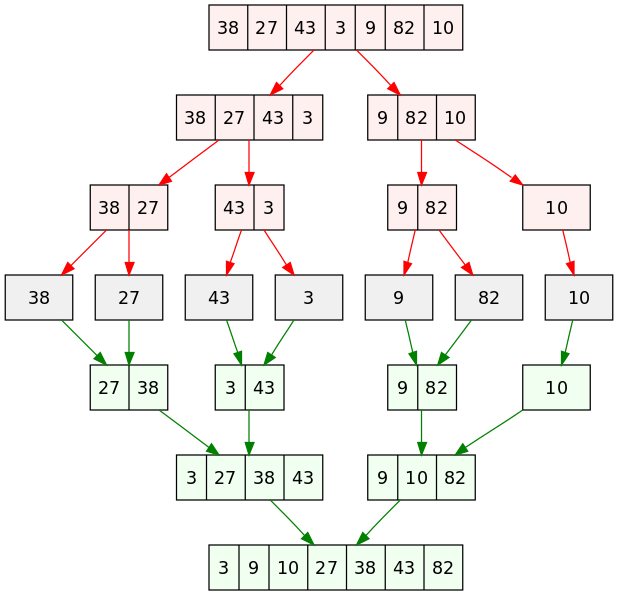

Nous allons séparer notre algorithme en deux fonctions, une qui réalise la fusion et l’autre qui réalise la récursion du tri(le découpage).

### La fusion

#### Principe et complexité
Pour fusionner les deux derniers sous-tableaux pour obtenir le tableau trié, il suffit d’une itération sur les deux listes en même temps :
- On considère 3 et 9, on place 3, et on avance sur la 1ère liste.
- On considère 27 et 9, on place 9, et on avance sur la 2e liste.
- On considère 27 et 10, on place 10, …
- On considère 27 et 82, on place 27, …
- On considère 38 et 82, on place 38, …
- On considère 43 et 82, on place 43, 
- On voit qu’on est arrivé au bout de la première liste, on place donc tous les éléments restants de la deuxième liste.

> 📌 Cette fusion est effectuée en 7 opérations, sa complexité est linéaire : $\mathcal{O}(n)$

#### Implémentation

L'algorithme qui renvoie un tableau trié né de la fusion de 2 tableaux triés est le suivant :

```txt
Algorithme fusion(t1, t2)
    // t1 et t2 sont deux tableaux triés
    
    // Initialisation
    i1 <- 0   // indice du 1er tableau
    i2 <- 0   // indice du 2e tableau
    t <- []   // tableau vide destiné à accueillir les éléments triés

    // Boucle
    TANT QUE l'on a pas atteint la fin d'un des tableaux
        SI t1[i1] <= t2[i2] ALORS
            Insérer t1[i1] à la fin de t
            incrémenter i1
        SINON
            Insérer t2[i2] à la fin de t
            incrémenter i2
        FIN SI
    FIN TANT QUE
    
    // Finalisation
    Insérer les éléments restants du tableau non vide t1 ou t2 à la fin de t
    
    RENVOYER t
```



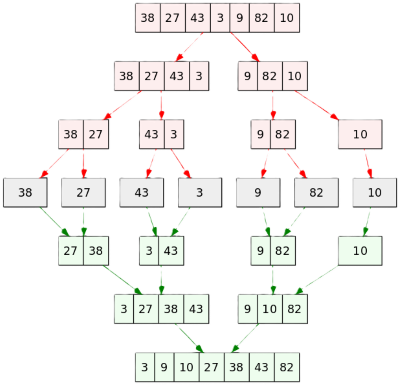

---
#### 💻 EXERCICE 3
> Implémentez en Python la fonction `fusion` définie par l'algorithme ci-dessus.

In [ ]:
# à completer


In [ ]:
# Vérification
fusion([3,27,38,43],[9,10,82]) # Doit retourner [3,9,10,27,38,43,82]

### Le découpage et l'appel récursif

#### Principe et complexité
Comme nous l'avons vu dans le TP sur la recherche dichotomique, découper successivement un tableau  en sous-tableaux de 1 élément s'effectue en un temps logarithmique : $\mathcal{O}(log_2(𝑛))$.

A chaque étape de découpage du tableau, on effectuera la fusion des sous-tableaux en un temps linéaire : $\mathcal{O}(n)$ (comme vu à l'instant)

> 📌 **Ainsi, l'algorithme complet du tri fusion s'exprime en  $\mathcal{O}(n\log_2(n))$ on parle de complexité quasi-linéaire**


#### Implémentation

L'algorithme qui effectue le découpage récursif d'un tableau quelconque et refusionne les deux tableaux triés est le suivant :

```txt
Algorithme tri_fusion(t)
    // t est un tableau quelconque
    n <- Longueur de t

    // Cas terminal
    SI n = 1 ALORS
        RENVOYER t
    FIN SI

    // Recursion sur les deux demi-tableaux 
    t1 <- tri_fusion(t[0:n//2])
    t2 <- tri_fusion(t[n//2:n])

    // Renvoi la fusion des deux tableaux
    RENVOYER fusion(t1, t2)
```



---
#### 💻 EXERCICE 4
> Implémentez en Python la fonction `tri_fusion` définie par l'algorithme ci-dessus.

In [ ]:
# à completer


In [ ]:
# Vérification
tri_fusion([38,27,43,3,9,82,10]) # Doit retourner [3,9,10,27,38,43,82]

### 💡Comparatif des tris fusion et selection
> Les fonctions `tri_selection` et `tri_insertion` suivantes implémentent l'algorithme des tri par sélection et insertion vus en classe de première et en début de terminale. 
> - Exécutez-les puis vérifiez leur bon fonctionnement

In [ ]:
# à exécuter
def tri_selection(t):
    for i in range(len(t)-1):
        mini=i
        for j in range(i+1,len(t)):
            if t[j] < t[mini]:
                mini = j
        t[i],t[mini] = t[mini],t[i]
    return t

def tri_insertion(l):
    for i in range(len(l)):
        cle=l[i]
        j=i-1
        while (j>=0) and l[j]>cle:
            l[j+1]=l[j]
            j-=1
        l[j+1]=cle
    return l

In [ ]:
# Vérification
tri_selection([38,27,43,3,9,82,10]) # Doit retourner [3,9,10,27,38,43,82]

In [ ]:
# Vérification
tri_insertion([38,27,43,3,9,82,10]) # Doit retourner [3,9,10,27,38,43,82]

> Le code ci-dessous permet de comparer les performances des tris fusion, sélection et insertion en triant des tableaux de différentes tailles 
>- Exécutez-le et constatez les résultats

In [ ]:
import timeit
import matplotlib.pyplot as plt
from random import shuffle

# différentes tailles de tableaux
abscisse =  [10, 100, 400, 600, 1000]

ordonnee_selection = [] # liste des temps par tri sélection
ordonnee_insertion = [] # liste des temps par tri insertion
ordonnee_fusion = []    # liste des temps par tri fusion

# Création des listes de tailles n
for n in abscisse:
    l = [i for i in range(n)] # Création du tableau
    shuffle(l)                # Mélange des éléments du tableau

    # Création des tableaux d'ordonnées correspondantes pour chaque graphique
    # Pour le tri par sélection :
    # Attention le tri sélection est un tri "en place" qui trie le tableau l. 
    # Il faut donc pour chaque mesure prendre une copie du tableau l initial, avec l[:]
    temps=timeit.timeit("tri_selection(l[:])", number=1, globals=globals())
    ordonnee_selection.append(1000*temps)

    # Pour le tri par insertion (même contrainte) :
    temps=timeit.timeit("tri_insertion(l[:])", number=1, globals=globals())
    ordonnee_insertion.append(1000*temps)
    
    # Par tri fusion
    temps=timeit.timeit("tri_fusion(l)", number=1, globals=globals())
    ordonnee_fusion.append(1000*temps)

# Graphique pour le tri sélection en rouge
plt.plot(abscisse, ordonnee_selection, "r-", label="Tri par sélection") # en rouge

# Graphique pour le tri insertion en vert
plt.plot(abscisse, ordonnee_insertion, "g-", label="Tri par insertion") # en rouge

# Graphique pour le tri fusion en bleu
plt.plot(abscisse, ordonnee_fusion, "b-", label="Tri fusion") # en bleu

plt.xlabel("Taille du tableau")
plt.ylabel("Temps en ms")
plt.legend()

plt.show()
plt.close()

> - Vous pouvez visualiser de belles animations des performances des différents algorithmes de tris sur [ce site](https://www.toptal.com/developers/sorting-algorithms)

### Conclusion

- Nous avons découvert dans ce chapitre un algorithme particulièrement élégant et **efficace** pour trier des éléments. Dans la pratique des contraintes de mémoire peuvent intervenir, et là au contraire cet algorithme se révélera peu performant, car l’utilisation de la récursivité et d'un tableau intermédiaire le rendent très gourmand en mémoire.

- La méthode _«diviser pour régner»_ est une méthode très efficace pour résoudre des problèmes complexes en les découpant en sous problèmes indépendants. Par contre, nous verrons dans un prochain cours qu’elle devient inefficace si les sous-problèmes se chevauchent, et il conviendra alors d’utiliser une nouvelle technique appelée « **Programmation dynamique** ».

---
## 👍 A savoir : Les complexités

### Les différentes complexités (classées par performance)

| Ordre de grandeur $\mathcal{O}$   | Nom              | Exemple                                         | Opérations pour n = 100 |
| :------------------:              |:---------------: |:---------------:                                | :---------------: | 
| $\mathcal{O}(1)$                  |   Constante      |  Accès à un élément de tableau                  | $1$   |
| $\mathcal{O}(log(n))$             |   Logarithmique  |  Exponentiation rapide / recherche dichotomique | $7$   |
| $\mathcal{O}(n)$                  |   Linéaire       |  Exponentiation récursive                       | $100$ |
| $\mathcal{O}(n \times log(n))$    |   Quasi-linéaire |  Tri fusion                                     | $700$ |
| $\mathcal{O}(n^2)$                |   Quadratique    |  Tris insertion et sélection                    | $10~000$ |
| $\mathcal{O}(2^n)$                |   Exponentielle  |  [Problème du sac à dos](https://fr.wikipedia.org/wiki/Probl%C3%A8me_du_sac_%C3%A0_dos) par force brute                          | $\approx 10^{30}$ |
| $\mathcal{O}(n!)$                 |   Factorielle    |  [Problème du voyageur de commerce](https://fr.wikipedia.org/wiki/Probl%C3%A8me_du_voyageur_de_commerce) avec une approche naïve            | $\approx 10^{157}$ |

### Représentation graphique

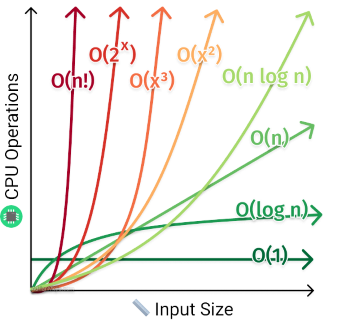

---

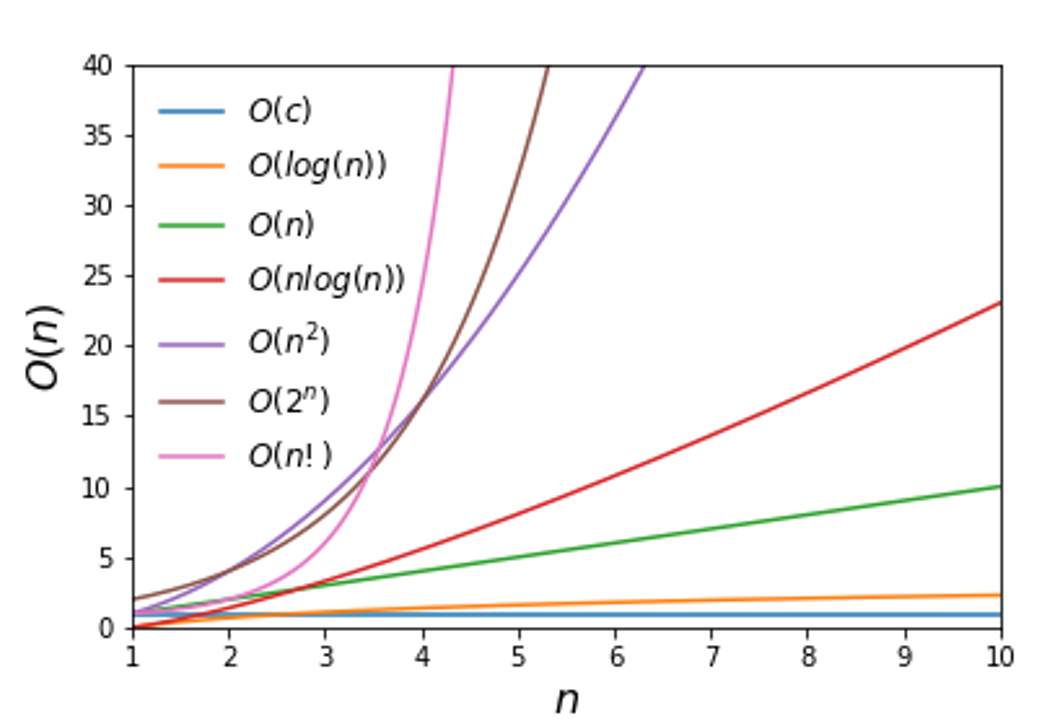